In [2]:
import os
import sys
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from Utils.tfcv import plot_convolution,plot_results,display_dataset


In [3]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype(np.float32) /255.0
x_test = x_test.astype(np.float32) / 255.0


2025-05-02 14:47:55.080473: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


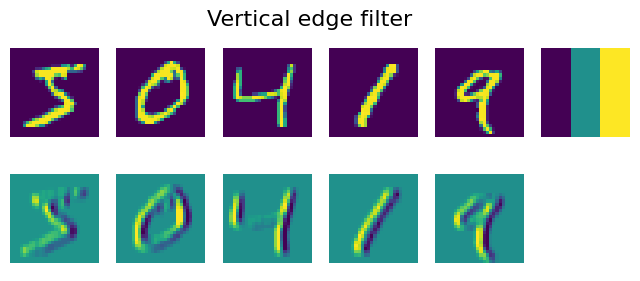

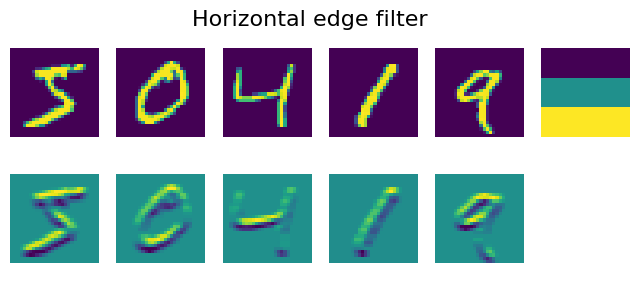

In [4]:
plot_convolution(x_train[:5],[[-1.,0.,1.],[-1.,0.,1.],[-1.,0.,1.]],'Vertical edge filter')
plot_convolution(x_train[:5],[[-1.,-1.,-1.],[0.,0.,0.],[1.,1.,1.]],'Horizontal edge filter')

In [5]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=9, kernel_size=(5,5), input_shape=(28,28,1),activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(10)
])
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['acc'])
model.summary()

/home/lindanjau/.local/share/virtualenvs/ai-x-CTmFw2/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 9)      │           234 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5184)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        51,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,084 (203.45 KB)

 Trainable params: 52,084 (203.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
x_train_c = np.expand_dims(x_train,3)
x_test_c = np.expand_dims(x_test,3)
hist = model.fit(x_train_c,y_train,validation_data=(x_test_c,y_test),epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - acc: 0.8962 - loss: 0.3618 - val_acc: 0.9736 - val_loss: 0.0910
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - acc: 0.9744 - loss: 0.0887 - val_acc: 0.9813 - val_loss: 0.0628
Epoch 3/5
1209/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - acc: 0.9795 - loss: 0.0700

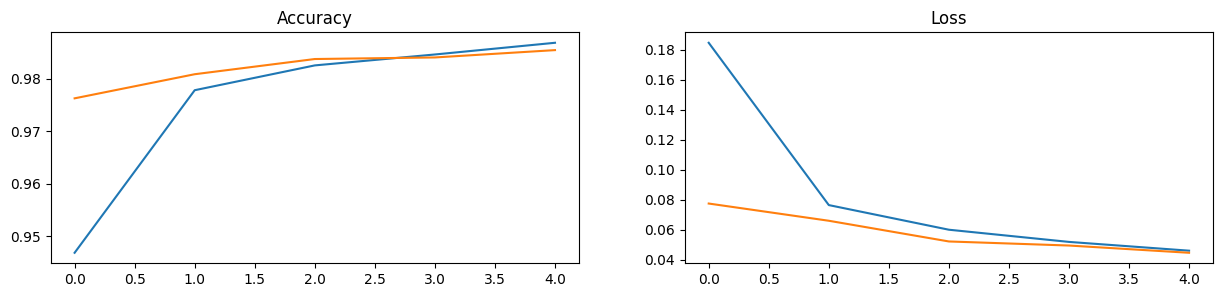

In [ ]:
plot_results(hist)

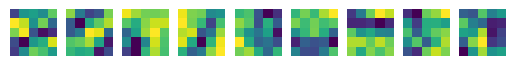

In [ ]:
fig,ax = plt.subplots(1,9)
l = model.layers[0].weights[0]
for i in range(9):
    ax[i].imshow(l[...,0,i])
    ax[i].axis('off')

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=10, kernel_size=(5,5), input_shape=(28,28,1),activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=20, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(10)
])
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['acc'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 10)     │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 20)       │         5,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         3,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,490 (33.16 KB)

 Trainable params: 8,490 (33.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist = model.fit(x_train_c,y_train,validation_data=(x_test_c,y_test),epochs=5)

Epoch 1/5


2025-05-01 18:09:30.109179: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - acc: 0.8763 - loss: 0.4320 - val_acc: 0.9769 - val_loss: 0.0701
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - acc: 0.9756 - loss: 0.0817 - val_acc: 0.9832 - val_loss: 0.0522
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - acc: 0.9832 - loss: 0.0533 - val_acc: 0.9863 - val_loss: 0.0440
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - acc: 0.9868 - loss: 0.0443 - val_acc: 0.9848 - val_loss: 0.0472
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - acc: 0.9882 - loss: 0.0379 - val_acc: 0.9893 - val_loss: 0.0347


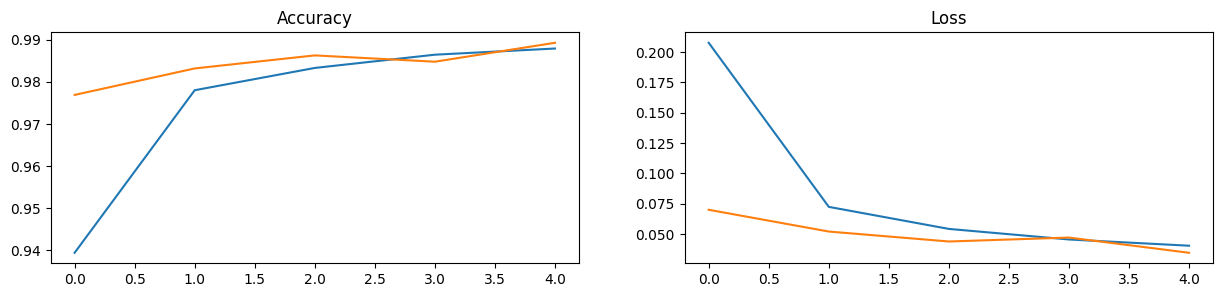

In [ ]:
plot_results(hist)

In [ ]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 877s 5us/step


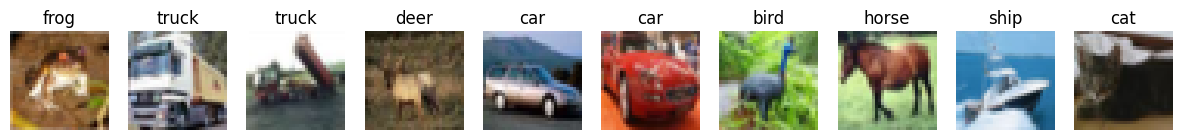

In [ ]:
display_dataset(x_train,y_train,classes=classes)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=6, kernel_size= 5, strides=1, activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),
    keras.layers.Conv2D(filters=16, kernel_size=5, strides=1, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(84, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])

model.summary()

/home/lindanjau/.local/share/virtualenvs/ai-x-CTmFw2/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
hist = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10


2025-05-01 18:26:52.161377: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.3259 - loss: 1.8203

2025-05-01 18:27:17.159664: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - acc: 0.3260 - loss: 1.8201 - val_acc: 0.4680 - val_loss: 1.4572
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - acc: 0.5008 - loss: 1.3930 - val_acc: 0.5327 - val_loss: 1.3369
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - acc: 0.5651 - loss: 1.2364 - val_acc: 0.5651 - val_loss: 1.2341
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - acc: 0.6015 - loss: 1.1360 - val_acc: 0.5908 - val_loss: 1.1726
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - acc: 0.6270 - loss: 1.0614 - val_acc: 0.5846 - val_loss: 1.1782
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - acc: 0.6403 - loss: 1.0146 - val_acc: 0.6054 - val_loss: 1.1217
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - acc: 0.6609 - loss: 0.9580 - val_acc: 0.6159 - val_loss: 1.0983
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - acc: 0.6781 - loss: 0.9025 - val_acc: 0.6123 - val_loss: 1.1305
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━

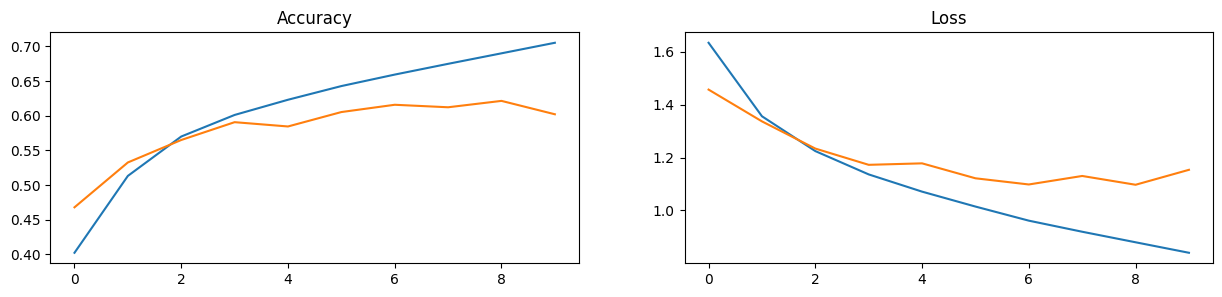

In [ ]:
plot_results(hist)